In [0]:
import pandas as pd
import numpy as np
rating_df = pd.read_csv("/rating_final.csv", encoding='latin-1')
rating = rating_df.dropna(axis = 0, subset = ['placeID'])
rating = (rating_df.groupby(by = ['placeID'])['rating'].count().reset_index().rename(columns = {'rating': 'rating_count'})[['placeID', 'rating_count']])
RC_data = pd.read_csv("/geoplaces2.csv", encoding='latin-1')
rating_df = rating_df.merge(rating, on='placeID')
rating_df.head(10)

,userID,placeID,rating,food_rating,service_rating,rating_count
0,U1077,135085,6.9,5.5,6.8,36
1,U1108,135085,7.0,6.3,5.0,36
2,U1081,135085,6.2,5.9,6.8,36
3,U1056,135085,6.4,6.4,6.6,36
4,U1134,135085,5.5,4.9,6.1,36
5,U1116,135085,6.5,7.2,6.1,36
6,U1132,135085,7.3,5.5,5.7,36
7,U1120,135085,7.3,6.0,7.4,36
8,U1036,135085,5.2,7.2,5.9,36
9,U1084,135085,5.7,5.2,5.9,36


In [0]:
RC_df = RC_data.drop(columns=['latitude','longitude','the_geom_meter','Rambience','fax','zip','alcohol','smoking_area','dress_code','accessibility','url','Rambience','franchise','area','other_services'])

In [0]:
RC_df = RC_df.dropna(how='any')
RC_df.head(10)

,placeID,name,address,city,state,country,price,popularity
0,134999,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,medium,150.437577
1,132825,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,low,139.082615
2,135106,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,medium,107.376788
4,132613,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,medium,43.926995
5,135040,Restaurant los Compadres,Camino a Simon Diaz 155 Centro,San Luis Potosi,SLP,Mexico,high,115.699814
6,132732,Taqueria EL amigo,Calle Mezquite Fracc Framboyanes,Cd Victoria,Tamaulipas,Mexico,low,48.681969
8,132609,Pollo_Frito_Buenos_Aires,tampico,victoria,Tamaulipas,Mexico,low,98.885637
9,135082,la Estrella de Dimas,Villa de Pozos 192 Villa de Pozos,San Luis Potosi,SLP,Mexico,medium,155.790452
10,135070,Restaurante 75,Villa de Pozos 4497 Villa de Pozos,San Luis Potosi,SLP,Mexico,medium,57.925623
11,135069,Abondance Restaurante Bar,Industrias 908 Valle Dorado,San Luis Potosi,SLP,Mexico,low,107.928811


In [0]:
print("Rating:",rating_df.shape)
print("Restaurants:",RC_df.shape)

Rating: (1161, 6)
Restaurants: (93, 8)


In [0]:
RC_df_merge = RC_df.merge(rating_df, on='placeID')
RC_df_merge = RC_df_merge.drop_duplicates(subset='placeID',keep='first')
RC_df_merge=RC_df_merge.reset_index()
RC_df_merge[['placeID','name','price','rating_count','rating','popularity']].head(10)

,placeID,name,price,rating_count,rating,popularity
0,134999,Kiku Cuernavaca,medium,5,7.3,150.437577
1,132825,puesto de tacos,low,32,7.6,139.082615
2,135106,El Rincón de San Francisco,medium,10,6.0,107.376788
3,132613,carnitas_mata,medium,6,7.1,43.926995
4,135040,Restaurant los Compadres,high,4,6.1,115.699814
5,132732,Taqueria EL amigo,low,8,7.4,48.681969
6,132609,Pollo_Frito_Buenos_Aires,low,5,6.7,98.885637
7,135082,la Estrella de Dimas,medium,9,7.1,155.790452
8,135070,Restaurante 75,medium,8,4.9,57.925623
9,135069,Abondance Restaurante Bar,low,12,6.5,107.928811


In [0]:
v=RC_df_merge['rating_count']
R=RC_df_merge['rating']
C=RC_df_merge['rating'].mean()
m=RC_df_merge['rating_count'].quantile(0.20)

In [0]:
RC_df_merge['weighted_average']=((R*v)+ (C*m))/(v+m)
RC_df_merge[['placeID','name','price','rating_count','rating','weighted_average','popularity']].head(10)

,placeID,name,price,rating_count,rating,weighted_average,popularity
0,134999,Kiku Cuernavaca,medium,5,7.3,6.777419,150.437577
1,132825,puesto de tacos,low,32,7.6,7.418221,139.082615
2,135106,El Rincón de San Francisco,medium,10,6.0,6.084946,107.376788
3,132613,carnitas_mata,medium,6,7.1,6.715836,43.926995
4,135040,Restaurant los Compadres,high,4,6.1,6.186022,115.699814
5,132732,Taqueria EL amigo,low,8,7.4,6.959553,48.681969
6,132609,Pollo_Frito_Buenos_Aires,low,5,6.7,6.477419,98.885637
7,135082,la Estrella de Dimas,medium,9,7.1,6.798157,155.790452
8,135070,Restaurante 75,medium,8,4.9,5.421092,57.925623
9,135069,Abondance Restaurante Bar,low,12,6.5,6.427894,107.928811


In [0]:
popularity=RC_df_merge.sort_values('popularity',ascending=False)
popularity =popularity.drop_duplicates(subset='placeID',keep='first')
popularity.reset_index(inplace = True)
popularity[['placeID','name','price','rating_count','rating','weighted_average','popularity']].head(10)

,placeID,name,price,rating_count,rating,weighted_average,popularity
0,135045,Restaurante la Gran Via,high,13,5.7,5.854122,418.708552
1,135048,Restaurante Bar Fu-hao,high,6,7.3,6.824927,243.791743
2,135075,Mariscos El Pescador,medium,13,8.2,7.659677,202.042635
3,132768,Mariscos Tia Licha,medium,10,6.6,6.484946,198.372395
4,135052,La Cantina Restaurante,high,25,6.4,6.375806,187.322927
5,132583,McDonalds Centro,low,4,6.5,6.363799,165.125366
6,135082,la Estrella de Dimas,medium,9,7.1,6.798157,155.790452
7,134999,Kiku Cuernavaca,medium,5,7.3,6.777419,150.437577
8,135065,El angel Restaurante,high,9,5.9,6.026728,145.847379
9,132854,Sirlone,medium,6,7.4,6.879472,144.448633


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


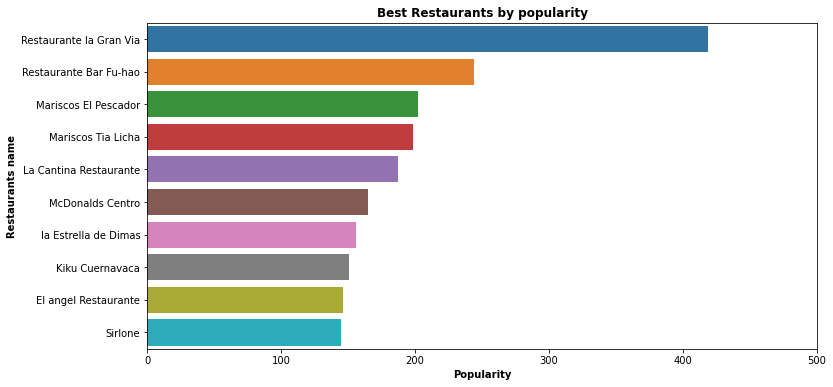

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['popularity'].head(10), y=popularity['name'].head(10), data=popularity)
plt.xlim(0,500)
plt.title('Best Restaurants by popularity', weight='bold')
plt.xlabel('Popularity', weight='bold')
plt.ylabel('Restaurants name', weight='bold')
plt.savefig('best_popularity.png')

In [0]:
Weighted_average=RC_df_merge.sort_values('weighted_average',ascending=False)
Weighted_average[['placeID','name','price','rating_count','rating','weighted_average','popularity']].head(10)
Weighted_average.reset_index(inplace = True)
Weighted_average[['placeID','name','price','rating_count','rating','weighted_average','popularity']].head(10)

,placeID,name,price,rating_count,rating,weighted_average,popularity
0,135075,Mariscos El Pescador,medium,13,8.2,7.659677,202.042635
1,132862,La Posada del Virrey,high,18,8.0,7.620617,37.668301
2,132825,puesto de tacos,low,32,7.6,7.418221,139.082615
3,135058,Restaurante Tiberius,medium,18,7.6,7.307574,70.867401
4,135053,La Fontana Pizza Restaurante and Cafe,high,8,7.7,7.144169,78.530105
5,135028,La Virreina,medium,15,7.4,7.113710,44.141021
6,134986,Restaurant Las Mananitas,high,8,7.6,7.082630,39.019229
7,132732,Taqueria EL amigo,low,8,7.4,6.959553,48.681969
8,135072,Sushi Itto,medium,8,7.3,6.898015,99.499595
9,132854,Sirlone,medium,6,7.4,6.879472,144.448633


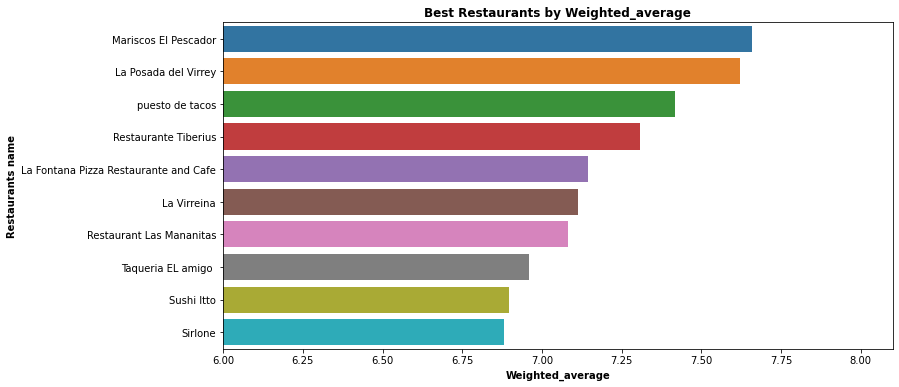

In [0]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x=Weighted_average['weighted_average'].head(10), y=Weighted_average['name'].head(10), data=Weighted_average)
plt.xlim(6,8.1,0.1)
plt.title('Best Restaurants by Weighted_average', weight='bold')
plt.xlabel('Weighted_average', weight='bold')
plt.ylabel('Restaurants name', weight='bold')
plt.savefig('best_weighted_average.png')

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
RC_df_m=scaling.fit_transform(RC_df_merge[['weighted_average','popularity']])
rating_normalized_df=pd.DataFrame(RC_df_m,columns=['weighted_average','popularity'])

In [0]:
RC_df_merge[['normalized_weight_average','normalized_popularity']]= rating_normalized_df
rating_cleaned_df = RC_df_merge.sort_values('popularity', ascending=False)
rating_cleaned_df = rating_cleaned_df.drop_duplicates(subset='name', keep='first')

In [0]:
rating_cleaned_df['score'] = rating_cleaned_df['normalized_weight_average'] * 0.5 + rating_cleaned_df['normalized_popularity'] * 0.5
rating_scored_df = rating_cleaned_df.sort_values(['score'], ascending=False)
rating_scored_df = rating_scored_df.drop_duplicates(subset='placeID',keep='first')
rating_scored_df.reset_index(inplace = True)
rating_scored_df[['placeID','name',	'address',	'city','country','rating','popularity']].head(10)

,placeID,name,address,city,country,rating,popularity
0,135075,Mariscos El Pescador,Himno Nacional 2104 Tangamanga,San Luis Potosi,Mexico,8.2,202.042635
1,135045,Restaurante la Gran Via,Venustiano Carranza 560 Centro,San Luis Potosi,Mexico,5.7,418.708552
2,135048,Restaurante Bar Fu-hao,Jesus Goytortua 390 Tangamanga,San Luis Potosi,Mexico,7.3,243.791743
3,132825,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,mexico,7.6,139.082615
4,132768,Mariscos Tia Licha,avenida salvador montiel,cuernavaca,mexico,6.6,198.372395
5,135082,la Estrella de Dimas,Villa de Pozos 192 Villa de Pozos,San Luis Potosi,Mexico,7.1,155.790452
6,132854,Sirlone,carr. mexico,San Luis Potosi,Mexico,7.4,144.448633
7,132862,La Posada del Virrey,Av. V. Carranza,San Luis Potosi,Mexico,8.0,37.668301
8,134999,Kiku Cuernavaca,Revolucion,Cuernavaca,Mexico,7.3,150.437577
9,132937,rockabilly,agustin de iturbide,san luis potosi,mexico,7.6,135.413856


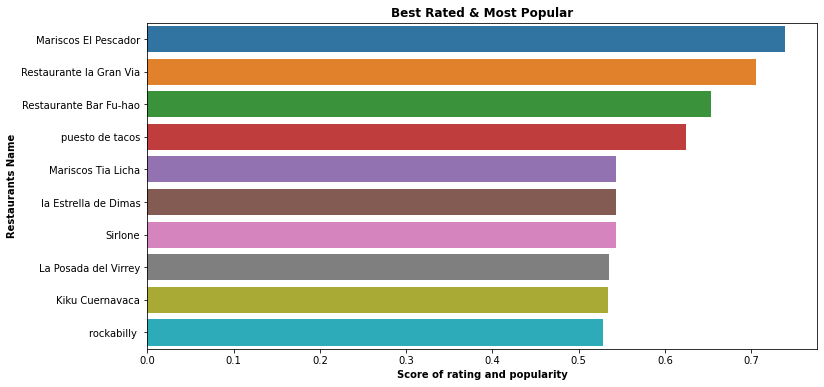

In [0]:
scored_df = rating_scored_df.sort_values('score', ascending=False)
plt.figure(figsize=(12,6))
ax = sns.barplot(x=scored_df['score'].head(10), y=scored_df['name'].head(10), data=scored_df)
plt.title('Best Rated & Most Popular', weight='bold')
plt.xlabel('Score of rating and popularity', weight='bold')
plt.ylabel('Restaurants Name', weight='bold')
plt.savefig('scored_rating.png')